In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
import numpy as np

from tensorflow.keras import layers
import time

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU, BatchNormalization
from tensorflow.keras.optimizers import Adam

In [ ]:
data_path = '/content/drive/MyDrive/veri_setleri/kddcup.data_10_percent.gz' #Specifies the path to the dataset.

col_names = ["duration","protocol_type","service","flag","src_bytes","dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins","logged_in",
             "num_compromised","root_shell","su_attempted","num_root","num_file_creations","num_shells","num_access_files","num_outbound_cmds",
             "is_host_login","is_guest_login","count","srv_count","serror_rate","srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
             "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count","dst_host_same_srv_rate","dst_host_diff_srv_rate",
             "dst_host_same_src_port_rate","dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate","dst_host_rerror_rate",
             "dst_host_srv_rerror_rate","label"]


df = pd.read_csv(data_path,names=col_names, index_col=False) #Reads the dataset from the CSV file into a pandas DataFrame df

In [ ]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


In [ ]:
df.shape

(494021, 42)

In [ ]:
df.dtypes

,0
duration,int64
protocol_type,object
service,object
flag,object
src_bytes,int64
dst_bytes,int64
land,int64
wrong_fragment,int64
urgent,int64
hot,int64


In [ ]:
df.isnull().sum()

,0
duration,0
protocol_type,0
service,0
flag,0
src_bytes,0
dst_bytes,0
land,0
wrong_fragment,0
urgent,0
hot,0


In [ ]:
df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,494021.000000,4.940210e+05,4.940210e+05,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,...,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000
mean,47.979302,3.025610e+03,8.685324e+02,0.000045,0.006433,0.000014,0.034519,0.000152,0.148247,0.010212,...,232.470778,188.665670,0.753780,0.030906,0.601935,0.006684,0.176754,0.176443,0.058118,0.057412
std,707.746472,9.882181e+05,3.304000e+04,0.006673,0.134805,0.005510,0.782103,0.015520,0.355345,1.798326,...,64.745380,106.040437,0.410781,0.109259,0.481309,0.042133,0.380593,0.380919,0.230590,0.230140
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.500000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,46.000000,0.410000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.200000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.032000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.040000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,58329.000000,6.933756e+08,5.155468e+06,1.000000,3.000000,3.000000,30.000000,5.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
num_cols = df._get_numeric_data().columns

cate_cols = list(set(df.columns)-set(num_cols))
cate_cols.remove('label')


cate_cols

['protocol_type', 'service', 'flag']

In [ ]:
#Visualization
def bar_graph(feature):
    df[feature].value_counts().plot(kind="bar")

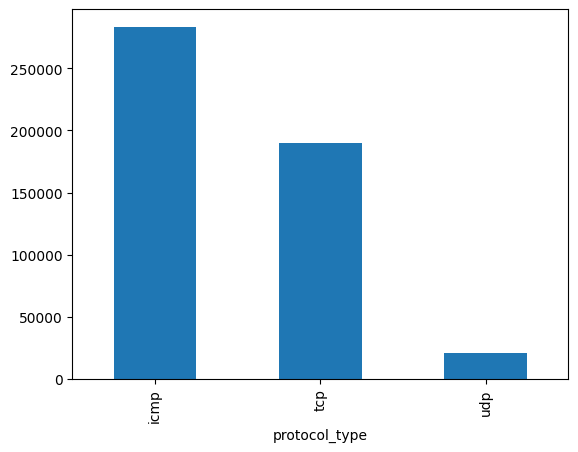

In [ ]:
bar_graph('protocol_type')


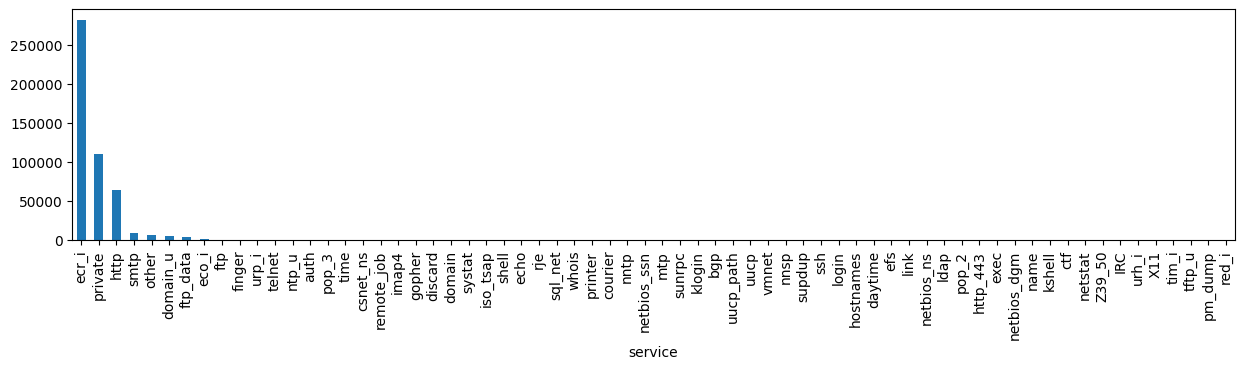

In [ ]:
plt.figure(figsize=(15,3))
bar_graph('service')

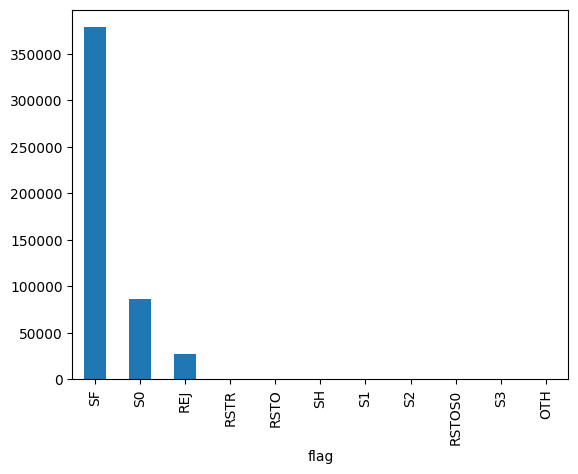

In [ ]:
bar_graph('flag')


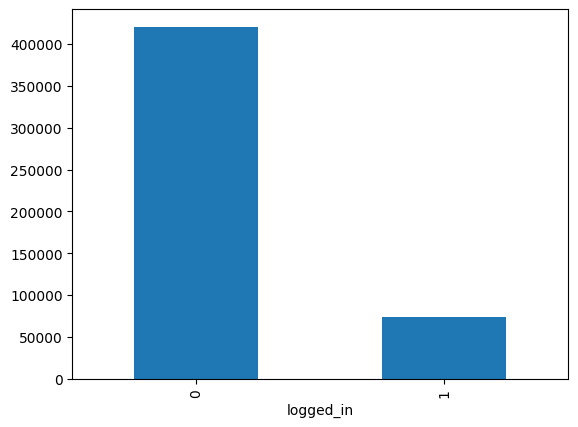

In [ ]:
bar_graph('logged_in')

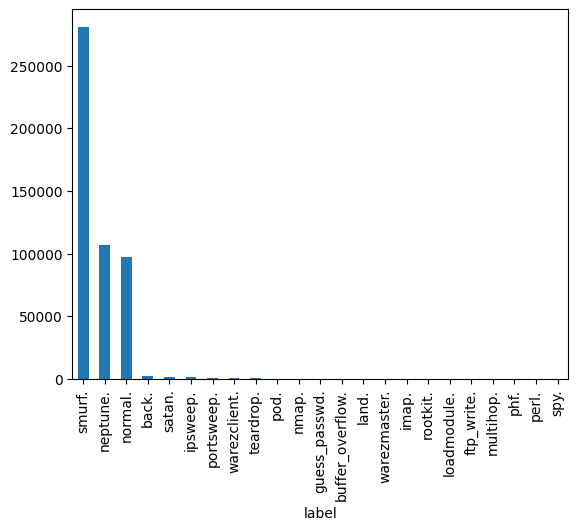

In [ ]:
bar_graph('label')


In [ ]:
label_enc = LabelEncoder()

In [ ]:
df['protocol_type'] = label_enc.fit_transform(df['protocol_type'])
df['service'] = label_enc.fit_transform(df['service'])
df['flag'] = label_enc.fit_transform(df['flag'])

In [ ]:
#Splitting features and target

X = df.drop(['label'], axis=1)
y = label_enc.fit_transform(df['label'])
np.unique(y)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22])

In [ ]:
label_enc.inverse_transform(np.unique(y))

array(['back.', 'buffer_overflow.', 'ftp_write.', 'guess_passwd.',
       'imap.', 'ipsweep.', 'land.', 'loadmodule.', 'multihop.',
       'neptune.', 'nmap.', 'normal.', 'perl.', 'phf.', 'pod.',
       'portsweep.', 'rootkit.', 'satan.', 'smurf.', 'spy.', 'teardrop.',
       'warezclient.', 'warezmaster.'], dtype=object)

In [ ]:
y_binary = np.where(y == 11, 0, 1)
np.unique(y_binary)

array([0, 1])

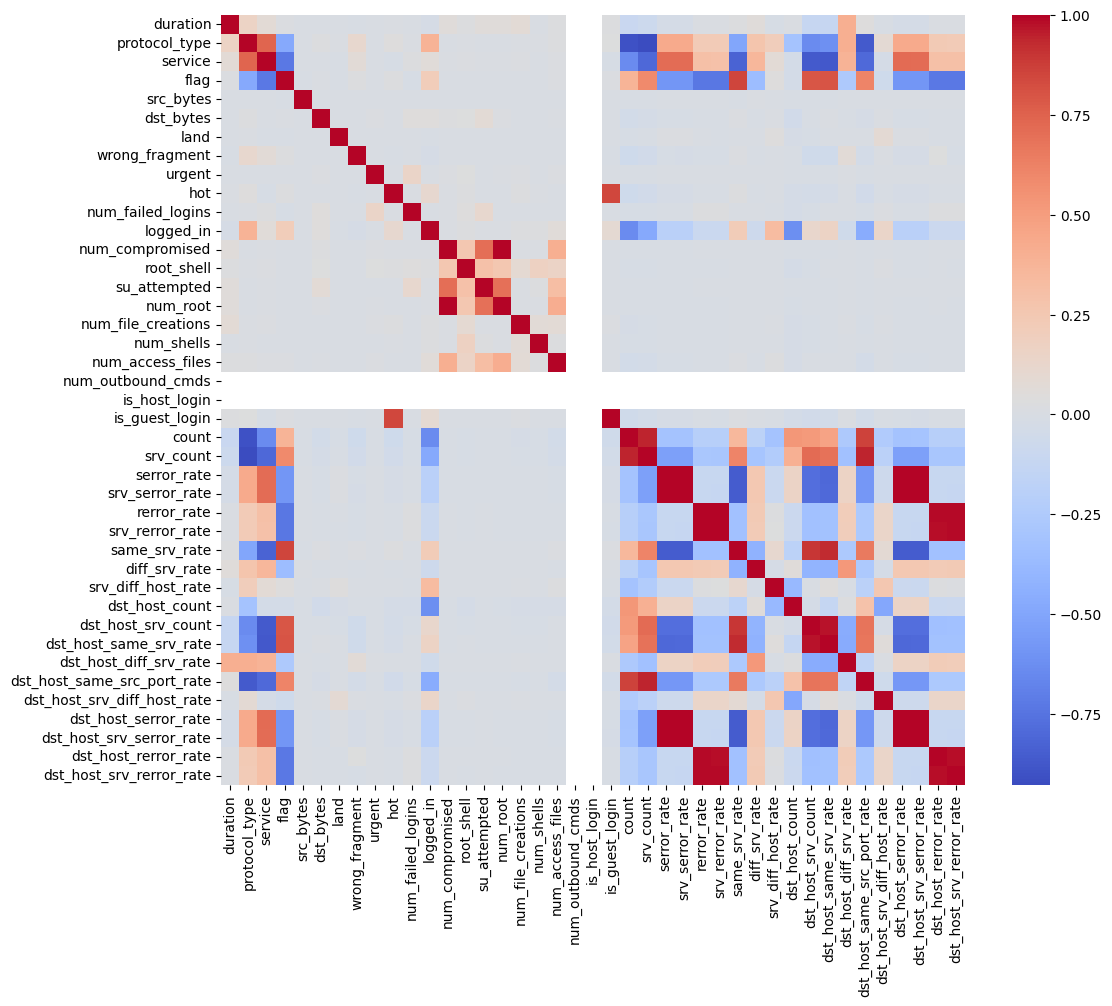

In [ ]:
corr_matrix = X.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.show()

In [ ]:
#This variable is highly correlated with num_compromised and should be ignored for analysis.
#(Correlation = 0.9938277978738366)
df.drop('num_root',axis = 1,inplace = True)

#This variable is highly correlated with serror_rate and should be ignored for analysis.
#(Correlation = 0.9983615072725952)
df.drop('srv_serror_rate',axis = 1,inplace = True)

#This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9947309539817937)
df.drop('srv_rerror_rate',axis = 1, inplace=True)

#This variable is highly correlated with srv_serror_rate and should be ignored for analysis.
#(Correlation = 0.9993041091850098)
df.drop('dst_host_srv_serror_rate',axis = 1, inplace=True)

#This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9869947924956001)
df.drop('dst_host_serror_rate',axis = 1, inplace=True)

#This variable is highly correlated with srv_rerror_rate and should be ignored for analysis.
#(Correlation = 0.9821663427308375)
df.drop('dst_host_rerror_rate',axis = 1, inplace=True)

#This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9851995540751249)
df.drop('dst_host_srv_rerror_rate',axis = 1, inplace=True)

#This variable is highly correlated with dst_host_srv_count and should be ignored for analysis.
#(Correlation = 0.9736854572953938)
df.drop('dst_host_same_srv_rate',axis = 1, inplace=True)

KeyError: "['num_root'] not found in axis"

In [ ]:
X.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate'],
      dtype='object')

In [ ]:
X.shape

(494021, 41)

In [ ]:
X.dtypes

,0
duration,int64
protocol_type,int64
service,int64
flag,int64
src_bytes,int64
dst_bytes,int64
land,int64
wrong_fragment,int64
urgent,int64
hot,int64


In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, LSTM, Dropout, Flatten
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Build Autoencoder
input_dim = X_scaled.shape[1]
encoding_dim = 30  # Number of features after compression

input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)
decoded = Dense(input_dim, activation='sigmoid')(encoded)
autoencoder = Model(inputs=input_layer, outputs=decoded)

encoder = Model(inputs=input_layer, outputs=encoded)  # Model to extract encoded features
autoencoder.compile(optimizer='adam', loss='mse')

In [ ]:
# Train Autoencoder
autoencoder.fit(X_scaled, X_scaled, epochs=50, batch_size=128, shuffle=True, verbose=1)

Epoch 1/50
3860/3860 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 0.7450
Epoch 2/50
3860/3860 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.7193
Epoch 3/50
3860/3860 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.6274
Epoch 4/50
3860/3860 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.6796
Epoch 5/50
3860/3860 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.7314
Epoch 6/50
3860/3860 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - loss: 0.6746
Epoch 7/50
3860/3860 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - loss: 0.8191
Epoch 8/50
3860/3860 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.6832
Epoch 9/50
3860/3860 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.7276
Epoch 10/50
3860/3860 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.7242
Epoch 11/50
3860/3860 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.6791
Epoch 12/50
3860/3860 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.6935
Epoch 13/50
3860/3860 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - loss: 0.6835
Epoch 14/50
3860/3860 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.6769
Epoch 15/50
3860/3860 ━━━━━

In [ ]:
# Apply Autoencoder for feature extraction
X_encoded = encoder.predict(X_scaled)

15439/15439 ━━━━━━━━━━━━━━━━━━━━ 19s 1ms/step


In [ ]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_binary, train_size=0.8, random_state=42, stratify=y_binary)

In [ ]:
# Reshape for LSTM (adding time-step dimension)
X_train = np.expand_dims(X_train, axis=1)
X_test = np.expand_dims(X_test, axis=1)

In [ ]:
# Convert labels to categorical for multi-class classification (if applicable)
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [ ]:
# Build LSTM Model
lstm_model = Sequential([
    LSTM(100, activation='tanh', return_sequences=False, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.3),
    Dense(50, activation='relu'),
    Dense(y_train_cat.shape[1], activation='softmax')
])

lstm_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Train LSTM
history = lstm_model.fit(X_train, y_train_cat, epochs=50, batch_size=64, validation_split=0.2, verbose=1)

Epoch 1/50
4941/4941 ━━━━━━━━━━━━━━━━━━━━ 29s 5ms/step - accuracy: 0.9917 - loss: 0.0238 - val_accuracy: 0.9988 - val_loss: 0.0040
Epoch 2/50
4941/4941 ━━━━━━━━━━━━━━━━━━━━ 38s 5ms/step - accuracy: 0.9986 - loss: 0.0046 - val_accuracy: 0.9991 - val_loss: 0.0035
Epoch 3/50
4941/4941 ━━━━━━━━━━━━━━━━━━━━ 43s 6ms/step - accuracy: 0.9986 - loss: 0.0043 - val_accuracy: 0.9992 - val_loss: 0.0032
Epoch 4/50
4941/4941 ━━━━━━━━━━━━━━━━━━━━ 39s 5ms/step - accuracy: 0.9987 - loss: 0.0041 - val_accuracy: 0.9992 - val_loss: 0.0030
Epoch 5/50
4941/4941 ━━━━━━━━━━━━━━━━━━━━ 25s 5ms/step - accuracy: 0.9989 - loss: 0.0037 - val_accuracy: 0.9992 - val_loss: 0.0029
Epoch 6/50
4941/4941 ━━━━━━━━━━━━━━━━━━━━ 41s 5ms/step - accuracy: 0.9989 - loss: 0.0036 - val_accuracy: 0.9992 - val_loss: 0.0028
Epoch 7/50
4941/4941 ━━━━━━━━━━━━━━━━━━━━ 41s 5ms/step - accuracy: 0.9989 - loss: 0.0035 - val_accuracy: 0.9993 - val_loss: 0.0027
Epoch 8/50
4941/4941 ━━━━━━━━━━━━━━━━━━━━ 41s 5ms/step - accuracy: 0.9990 - loss: 0

In [ ]:
# Predictions
y_pred_proba = lstm_model.predict(X_test)
y_pred = np.argmax(y_pred_proba, axis=1)

3088/3088 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step


In [ ]:
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score

# Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')

In [ ]:
print("Accuracy:", accuracy)
print("Precision:", precision)

Accuracy: 0.9993522595010373
Precision: 0.9993523806820596


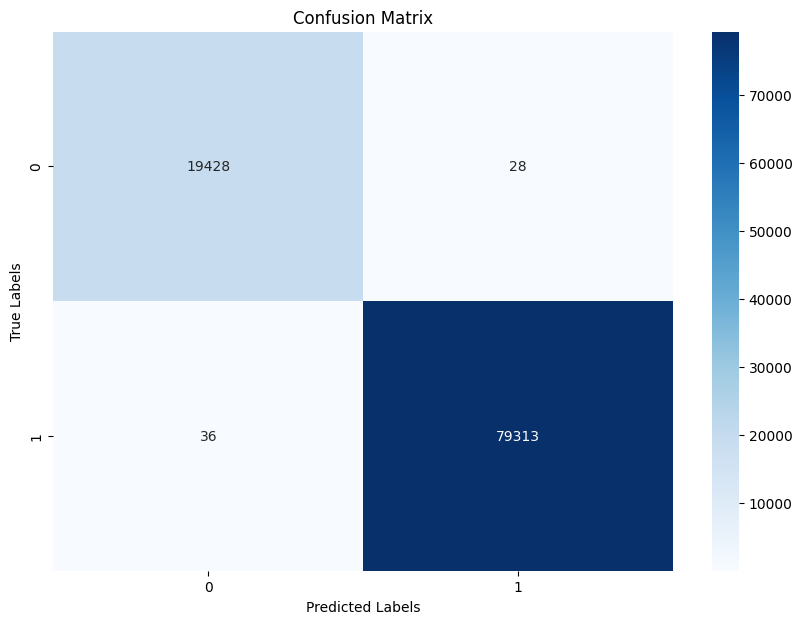

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     19456
           1       1.00      1.00      1.00     79349

    accuracy                           1.00     98805
   macro avg       1.00      1.00      1.00     98805
weighted avg       1.00      1.00      1.00     98805

